# Pattern Recognition
## Natalia Hoyos
## Assignment 1

### Question 1: Consider two classes described by covariance matrices and zero mean)



#### a. For each covariance matrix generate 1000 data samples and plot them on separate figures.

In [0]:
import matplotlib as mplab  #Change document format
import matplotlib.pyplot as plt #to plot
from matplotlib.patches import Ellipse  # to plot contour
from matplotlib.colors import ListedColormap  # To change colors of plots
from matplotlib.patches import Patch  # To modify legend
# from matplotlib.mlab import bivariate_normal

import numpy as np  #To hanlde arrays and do math
import pandas as pd #To use DataFrames
from numpy import linalg as LA  #Import numpy's linear algebra functions (used to modify the normal distributions according to cov matrix)

import seaborn as sns # Plot heatmap

import gzip #open dataset question 3
import urllib  # To download dataset from url

## https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html
## from small to large (seaborn-notebook, seaborn-talk, seaborn-poster)
plt.style.use('seaborn-talk')

mplab.rcParams['figure.figsize'] = [16.18,10]


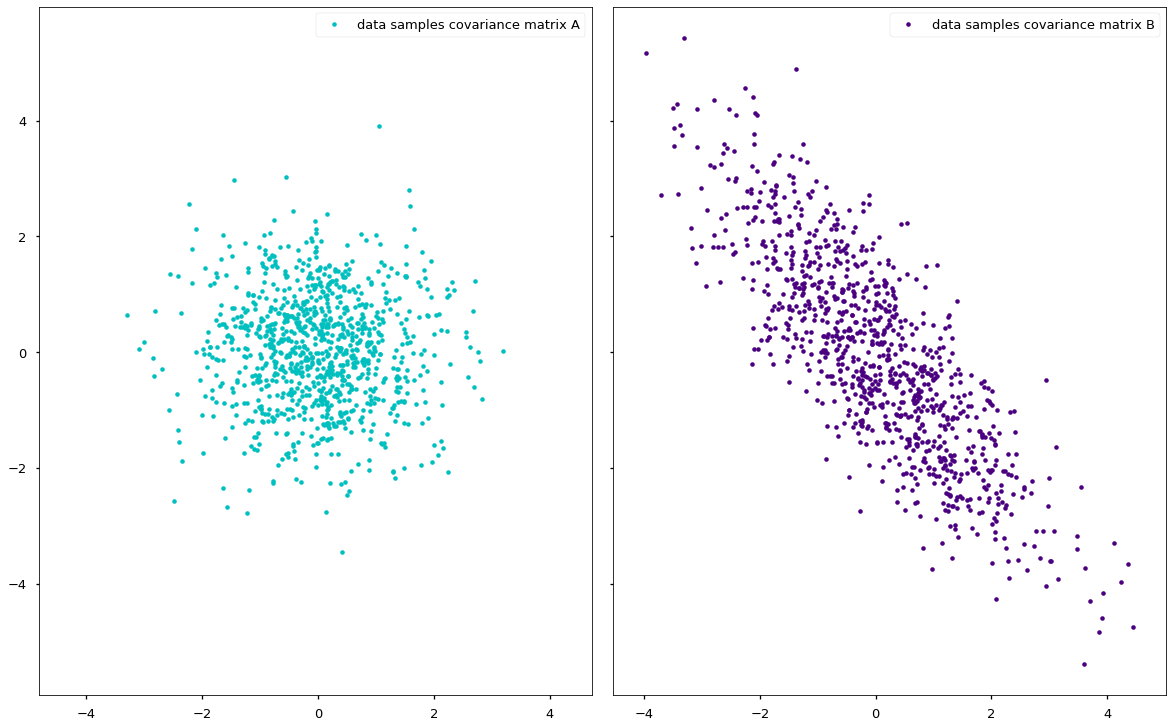

In [2]:
## Datapoints creation
## Inspired in https://stackoverflow.com/questions/14920272/generate-a-data-set-consisting-of-n-100-2-dimensional-samples
mean = (0, 0)

covA_ideal = [[1,0],[0,1]]
covB_ideal = [[2,-2],[-2,3]]

N = 1000

## sample_creation function: creates a normal distribution that then is modified
## by the covariance matrix via choelsky
def sample_creation (mean, cov):
  uncorrelated = np.random.standard_normal((2,N))

  L = np.linalg.cholesky(cov)
  data = np.dot(L,uncorrelated) + np.array(mean).reshape(2,1)

  return data

dataA = sample_creation(mean, covA_ideal)
dataB = sample_creation(mean, covB_ideal)

## Plot samples created
fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, subplot_kw={'aspect': 'equal'})

ax[0].plot(dataA[0], dataA[1], '.', label = "data samples covariance matrix A", color = 'c')

ax[0].axis('equal')
ax[0].legend()


ax[1].plot(dataB[0], dataB[1], '.', label = "data samples covariance matrix B", color = 'indigo')
ax[1].axis('equal')
ax[1].legend()
plt.show()

# mean = [0,0]

# xa, ya = np.random.multivariate_normal(mean, cova, 1000).T

# fig = plt.figure(figsize=(15,10))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(xa, ya , ".")
# ax.axis('equal')
# plt.title("Samples from Covariance matrix A")
# plt.show()

#### b. For each case calculate first standard deviation contour as a function of the mean, eigenvalues, and eigenvectors. Show your calculation (Hint: consider distribution whitening from the tutorial). You may use preexisting functions for Eigen computation. Plot each contour on the respective plots from part (a).


In [0]:
## Function covariance calculates the covariance matrix 
def covariance_vectors (varX, varY):
  """Computes the covariance between two vectors """
  meanX = np.mean(varX)
  meanY = np.mean(varY)
  sum = 0
  for i in range(varX.size):
    sum = sum + ((varX[i]-meanX)*(varY[i]-meanY))
  cov = sum/(varX.size - 1)
  return cov  

def covariance_matrix (mat):
  """Computes the covariance of a matrix of features """

  mean = np.mean(mat, axis = 0) # Each row of the matrix is a feature
  mat_size = mat.shape[0] # Obtain the sample size
  mat = mat - mean# Substract the mean from the matrix
  covariance_matrix = (mat.T.dot(mat)) / (mat_size-1) # Sample mean instead of real mean
  return covariance_matrix

def calculateCovariance(X):
  meanX = np.mean(X, axis = 0)
  lenX = X.shape[0]
  X = X - meanX
  covariance = X.T.dot(X)/lenX
  return covariance

In [8]:
y = np.array([[1,2,1],[2,3,2],[3,4,3]])
# A = np.array([[1, 3, 5], [5, 4, 1], [3, 8, 6]])
print(y)
print(np.cov(y.T))

ymean = np.mean(y, axis = 0)
print(ymean)

mat = y-ymean
print(mat)
print(np.dot(mat.T, mat))
print(mat.shape)
print(np.dot(mat.T, mat)/2)
print(covariance_matrix(y))
# print(covariance_matrix(A))

print(covariance_vectors(y[0],y[1]))

[[1 2 1]
 [2 3 2]
 [3 4 3]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[2. 3. 2.]
[[-1. -1. -1.]
 [ 0.  0.  0.]
 [ 1.  1.  1.]]
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
(3, 3)
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
0.33333333333333337


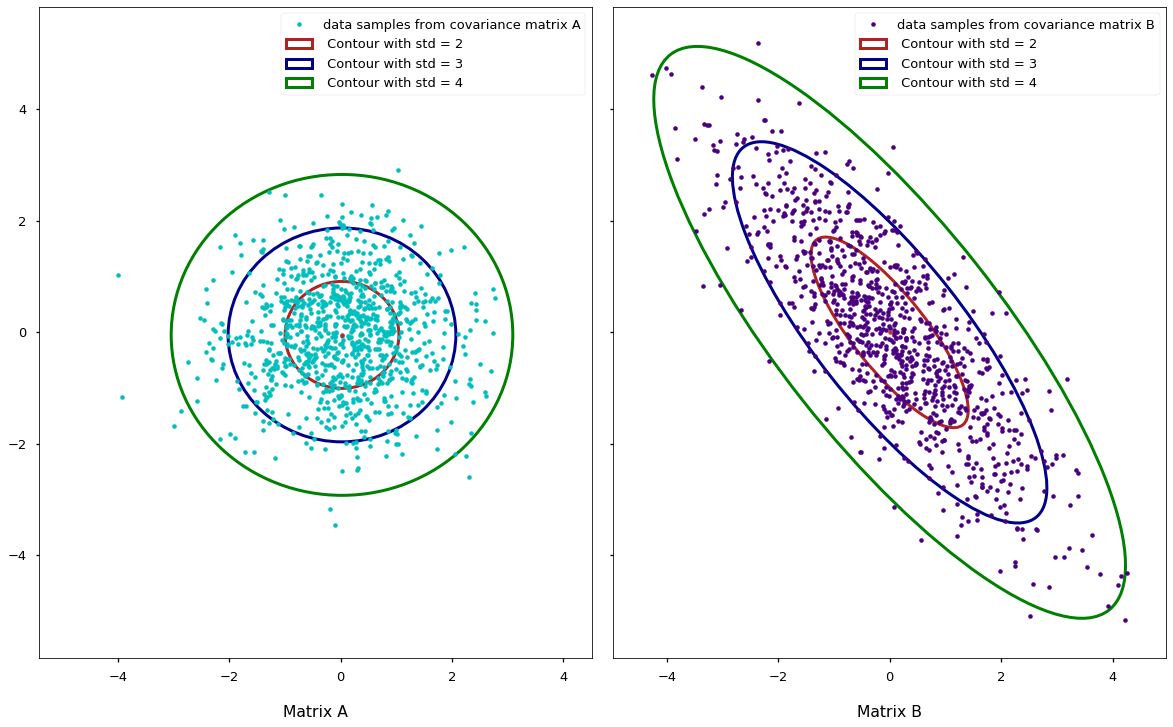

In [0]:
# eigenvalues w and right eigenvectors v. The eigenvectors are the columns of w
# inspired on https://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/


# function dots adds the scatter plot to the ax based on the input data
def dots(ax, data, name, dotsColor = 'c'):
  x = data[0]
  y = data[1]
  ax.plot(x, y , ".", label = "data samples from covariance matrix " + name, color = dotsColor) 
  ax.axis('equal')


# function contour plots the ellipse contour based on the mean an covariance matrix.
# it uses eigenvalues decomposition to obtain the ellipse's  height, width and angle.
def countour(ax, data= None, mean = None, cov = None, colors = None, nums = None, name = None):
  
  if data is not None:
    x = data[0]
    y = data[1]

  if mean is None:
    meanX = np.mean(x)
    meanY = np.mean(y)
  else:
    meanX = mean[0]
    meanY = mean[1]

  if cov is None:
    cov = np.array([[covariance_vectors(x,x),covariance_vectors(x,y)],\
                    [covariance_vectors(y,x),covariance_vectors(y,y)]])

  wh, vh = LA.eigh(cov)

  if nums is None:
    nums = range(1,4)

  if colors == None:
    colors = ("firebrick", "darkblue", "g")

  if name != None:
    name = "Matrix " + name + " "
  else:
    name = " "    

  
  attributes = zip(nums, colors)

  for num, color in attributes:
      
    width = 2*np.sqrt(wh[1])*(num)
    height = 2*np.sqrt(wh[0])*(num)

    angleh = (np.arctan(vh[1][1]/vh[0][1]))*180/np.pi

    ellipse = Ellipse((meanX, meanY), width, height,
                      angle=angleh, linewidth=3,edgecolor = color, 
                      fill=False, zorder=2, label = nums)
    
    ellipse.set(label = name + "Contour with std = " + str(num+1))


  # ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
  ax.plot(meanX, meanY, '.', linewidth = 3, color = colors[0], alpha = 0.9)
  ax.legend()
  return ax


fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True,
                       constrained_layout = True, subplot_kw={'aspect': 'equal'})
dots(ax[0], dataA, "A")
countour(ax[0], dataA)
ax[0].axis('equal')
ax[0].set_title('Matrix A', y = -0.1)

dots(ax[1], dataB, "B", 'indigo')
countour(ax[1], dataB)
ax[1].axis('equal')
ax[1].set_title('Matrix B', y = -0.1)

plt.show()

In [0]:
## ---------- To understand eig and eigh

# covtesting = [[1,5,-2],[5,1,-3],[-2,-3,1]]
# w, v = LA.eig(covtesting)
# wh, vh = LA.eigh(covtesting)

# print("vh", vh)
# print("v", v)

# print(covtesting)

#### c. Calculate sample covariance matrices for each class using the data generated in part. Do not use Python functions for computing the covariance.

In [0]:
## Lets calculate the covariance matrices using the python function first
xa = dataA[0]
ya = dataA[1]

xb = dataB[0]
yb = dataB[1]


cova2_test = np.cov(xa,ya)
covb2_test = np.cov(xb,yb)
print("Covariance A with python function: \n", cova2_test)
print("Covariance B with python function: \n", covb2_test)


Covariance A with python function: 
 [[1.04419055e+00 3.66827658e-04]
 [3.66827658e-04 9.21199490e-01]]
Covariance B with python function: 
 [[ 1.99124722 -1.9678632 ]
 [-1.9678632   2.92650794]]


In [0]:
## Manually get the covariance matrix
cova2 = np.array([[covariance_vectors(xa,xa),covariance_vectors(xa,ya)], \
                  [covariance_vectors(ya,xa),covariance_vectors(ya,ya)]])
print("Covariance A: \n",cova2)

covb2 = np.array([[covariance_vectors(xb,xb),covariance_vectors(xb,yb)], \
                  [covariance_vectors(yb,xb),covariance_vectors(yb,yb)]])
print("Covariance B: \n",covb2)

Covariance A: 
 [[1.04419055e+00 3.66827658e-04]
 [3.66827658e-04 9.21199490e-01]]
Covariance B: 
 [[ 1.99124722 -1.9678632 ]
 [-1.9678632   2.92650794]]


In [0]:
xx = np.array([xa,ya])
cova3 = covariance_matrix(xx)
print("Covariance A: \n",cova3)

Covariance A: 
 [[ 0.49257809 -0.49257809]
 [-0.49257809  0.49257809]]


#### d. Explain the difference between the given covariance matrix for each class and the corresponding sample covariance matrix generated in (b). In which condition they can be the same?


### 2. Consider a 2D problem with 3 classes where each class is described by priors, mean vectors, and covariance matrices.


#### a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.

MAP Classifier

In [0]:
## Based on https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
## Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf

PC1 = 0.2
meanC1 = np.array([3, 2]).T
covC1 = np.array([[1, -1],[-1, 2]])

PC2 = 0.7
meanC2 = np.array([5, 4]).T
covC2 = [[1, -1], [-1, 2]]

PC3 = 0.1
meanC3 = np.array([2, 5]).T
covC3 = [[0.5, 0.5], [0.5, 3]]

In [0]:
## Based on https://stackoverflow.com/questions/22294241/plotting-a-decision-boundary-separating-2-classes-using-matplotlibs-pyplot
## Based on http://www.nada.kth.se/~stefanc/DATORSEENDE_AK/l5.pdf

def discriminantClass(coordinate, prob = PC1, mean = meanC1, cov = covC1, ML = False):
  if ML == True:
    prob = 1/3
  coordinate = np.array(coordinate)
  cov_inverse = np.linalg.inv(cov)
  W_i = -0.5 * cov_inverse
  w_i = cov_inverse @ mean
  w_i_0 = -0.5 * mean.T @ cov_inverse @ mean - 0.5 * np.log(np.linalg.det(cov)) + np.log(prob)
  result = coordinate.T @ W_i @ coordinate + w_i.T @ coordinate + w_i_0
  return result

In [0]:
print(discriminantClass([2,5]))
print(discriminantClass([2,5]))
print(discriminantClass([2,5]))

-4.1094379124341
-4.1094379124341
-4.1094379124341


In [0]:
def discriminate (coordinate1, coordinate2, ML = False):
  C1 = discriminantClass([coordinate1, coordinate2], PC1, meanC1, covC1, ML)
  C2 = discriminantClass([coordinate1, coordinate2], PC2, meanC2, covC2, ML)
  C3 = discriminantClass([coordinate1, coordinate2], PC3, meanC3, covC3, ML)

  if ((C1 >= C2) and (C1 >= C3)):
    classification = 1
  elif ((C2 >= C1) and (C2 >= C3)):
    classification = 2
  elif ((C3 >= C2) and (C3 >= C1)):
    classification = 3
  return classification


In [0]:
## Based on https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
# Plot of the decision boundary. Each point in the mesh has a color based on its class
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = -15, 15.1
y_min, y_max = -15, 15.1
h = 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
discriminateGridMAP = np.zeros((Z.shape[0], 1))
for i in range(Z.shape[0]):
  discriminateGridMAP[i] = discriminate(Z[i,0], Z[i,1])

cmap_colors = ['indigo', 'purple', 'paleturquoise']
cmap = ListedColormap(cmap_colors)

discriminateGridMAP = discriminateGridMAP.reshape(xx.shape)

discriminateGridML = np.zeros((Z.shape[0], 1))
for i in range(Z.shape[0]):
  discriminateGridML[i] = discriminate(Z[i,0], Z[i,1], True)


cmap = ListedColormap(['indigo', 'purple', 'paleturquoise'])

discriminateGridML = discriminateGridML.reshape(xx.shape)


<Figure size 1164.96x720 with 0 Axes>

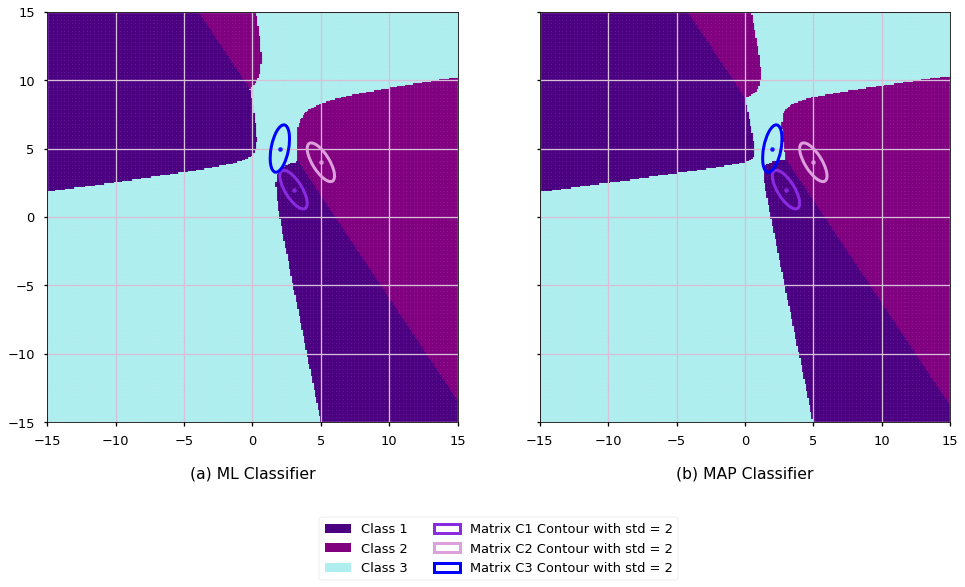

In [0]:
plt.figure()

fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True, subplot_kw = {'aspect': 'equal'})

countour(ax[0], data = None, mean = meanC1, cov = covC1, colors = ['blueviolet'], nums = [1], name = 'C1')
countour(ax[0], data = None, mean = meanC2, cov = covC2, colors = ['plum'], nums = [1], name = 'C2')
countour(ax[0], data = None, mean = meanC3, cov = covC3, colors = ['b'], nums = [1], name = 'C3')


ax[0].pcolormesh(xx, yy, discriminateGridML, cmap=cmap, alpha = 0.9)
ax[0].grid(True, color = 'thistle')
ax[0].set_title('(a) ML Classifier', y = -0.15)
ax[0].get_legend().remove()


countour(ax[1], data = None, mean = meanC1, cov = covC1, colors = ['blueviolet'], nums = [1], name = 'C1')
countour(ax[1], data = None, mean = meanC2, cov = covC2, colors = ['plum'], nums = [1], name = 'C2')
countour(ax[1], data = None, mean = meanC3, cov = covC3, colors = ['b'], nums = [1], name = 'C3')

# legendHandles, labels = ax[0].get_legend_handles_labels()
# legendHandles.insert(0, Patch(facecolor = cmap_colors[0], edgecolor = 'None',
#                      label = "Class 1"))
# legendHandles.insert(1, Patch(facecolor = cmap_colors[1], edgecolor = 'None',
#                      label = "Class 2"))
# legendHandles.insert(2, Patch(facecolor = cmap_colors[2], edgecolor = 'None',
#                      label = "Class 3"))

## Set the legend
# ax[0].legend(handles = legendHandles, ncol = 2, loc = 3)

# # ax.pcolormesh(xx, yy, discriminateGrid, cmap=plt.get_cmap('Set1'))
ax[1].pcolormesh(xx, yy, discriminateGridMAP, cmap=cmap, alpha = 0.9)
ax[1].grid(True, color = 'thistle')
ax[1].set_title('(b) MAP Classifier', y = -0.15)


legendHandles, labels = ax[1].get_legend_handles_labels()
legendHandles.insert(0, Patch(facecolor = cmap_colors[0], edgecolor = 'None',
                     label = "Class 1"))
legendHandles.insert(1, Patch(facecolor = cmap_colors[1], edgecolor = 'None',
                     label = "Class 2"))
legendHandles.insert(2, Patch(facecolor = cmap_colors[2], edgecolor = 'None',
                     label = "Class 3"))

## Set the legend
# ax[1].legend(handles = legendHandles, ncol = 2, loc = 3)
ax[1].legend(handles = legendHandles, ncol = 2, loc = 8, bbox_to_anchor = (-0.1, -0.4))

ML Classifier

#### b) Generate a 3000 sample dataset using the prior probabilities of each class. For both the ML and MAP classifiers: classify the generated dataset, calculate a confusion matrix, and calculate the experimental P(ε). Discuss the results.


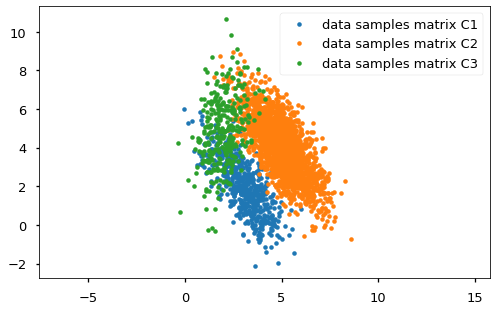

In [0]:
## Create the datapoints

N = 3000

# Create samples from a normal distribution
uncorrelated = np.random.standard_normal((2,N))

# Pick samples from a random uniform distribution
ran = pd.DataFrame(np.random.uniform(size = 3000))
filtering = pd.concat([pd.DataFrame(uncorrelated.T),ran] , ignore_index=True, axis = 1)

# split the dataset into classes
filteredC1 = filtering[filtering[2]<=0.2].iloc[:,:-1].to_numpy().T
filteredC2 = filtering[(0.2 < filtering[2]) & (filtering[2]<=0.9)].iloc[:,:-1].to_numpy().T
filteredC3 = filtering[filtering[2]>0.9].iloc[:,:-1].to_numpy().T

# Modify the normal distribution according to each class's mean and covariacne matrix 
LC1 = np.linalg.cholesky(covC1)
LC2 = np.linalg.cholesky(covC2)
LC3 = np.linalg.cholesky(covC3)

dataC1 = np.dot(LC1,filteredC1) + np.array(meanC1).reshape(2,1)
dataC2 = np.dot(LC2,filteredC2) + np.array(meanC2).reshape(2,1)
dataC3 = np.dot(LC3,filteredC3) + np.array(meanC3).reshape(2,1)


# Plot the samples
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'}, figsize=(8.08, 5))
ax.plot(dataC1[0], dataC1[1], '.', label = "data samples matrix C1")
ax.plot(dataC2[0], dataC2[1], '.', label = "data samples matrix C2")
ax.plot(dataC3[0], dataC3[1], '.', label = "data samples matrix C3")
ax.axis('equal')
ax.legend()
plt.show()

In [0]:
data2 = np.c_[dataC1, dataC2, dataC3]
data2 = data2.T

## Create ClassificationMatrix. 
# First Column: Real classification
# Second Column: MAP
# Third Column: ML
classificationMatrix = np.zeros((data2.shape[0], 3))
classificationMatrix[0:(dataC1.shape[1]-1),0]=1
classificationMatrix[(dataC1.shape[1]):(dataC1.shape[1]+dataC2.shape[1]),0]=2
classificationMatrix[(dataC1.shape[1]+dataC2.shape[1]):(dataC1.shape[1]+dataC2.shape[1]+dataC3.shape[1]),0]=3
classificationMatrix[2999,0]
for i in range(data2.shape[0]):
  classificationMatrix[i,1] = discriminate(data2[i,0], data2[i,1])  # Populate classificationMatrix with MAP results
  classificationMatrix[i,2] = discriminate(data2[i,0], data2[i,1], True)  # Populate classificationMatrix with ML results


## Confusion Matrix
##               Real
##              1     2      3 
## Predicted 1 T1     F1     F1
## Predicted 2 F2     T2     F2
## Predicted 3 F3     F3     T3
def populateConfusionMatrix(confusionMatrix, method):

  if method.upper() == "ML":
    column = 2
  elif method.upper() == "MAP":
    column = 1

  experimentalError = 0
  for i in range(3):
    j=i+1
    for k in range(3):
      l = k+1
      confusionMatrix[i,k] = classificationMatrix[classificationMatrix[:,column]==j][classificationMatrix[classificationMatrix[:,column]==j][:,0]==l].shape[0]
      if i != k:
        experimentalError = experimentalError + confusionMatrix[i,k]
  
  experimentalError = experimentalError/classificationMatrix.shape[0]
  
  return confusionMatrix, experimentalError


confusionMatrixMAP = np.zeros((3, 3))

confusionMatrixML = np.zeros((3, 3))

confusionMatrixMAP, experimentalErrorMAP = populateConfusionMatrix(confusionMatrixMAP, 'MAP')

confusionMatrixML, experimentalErrorML = populateConfusionMatrix(confusionMatrixML, 'ML')

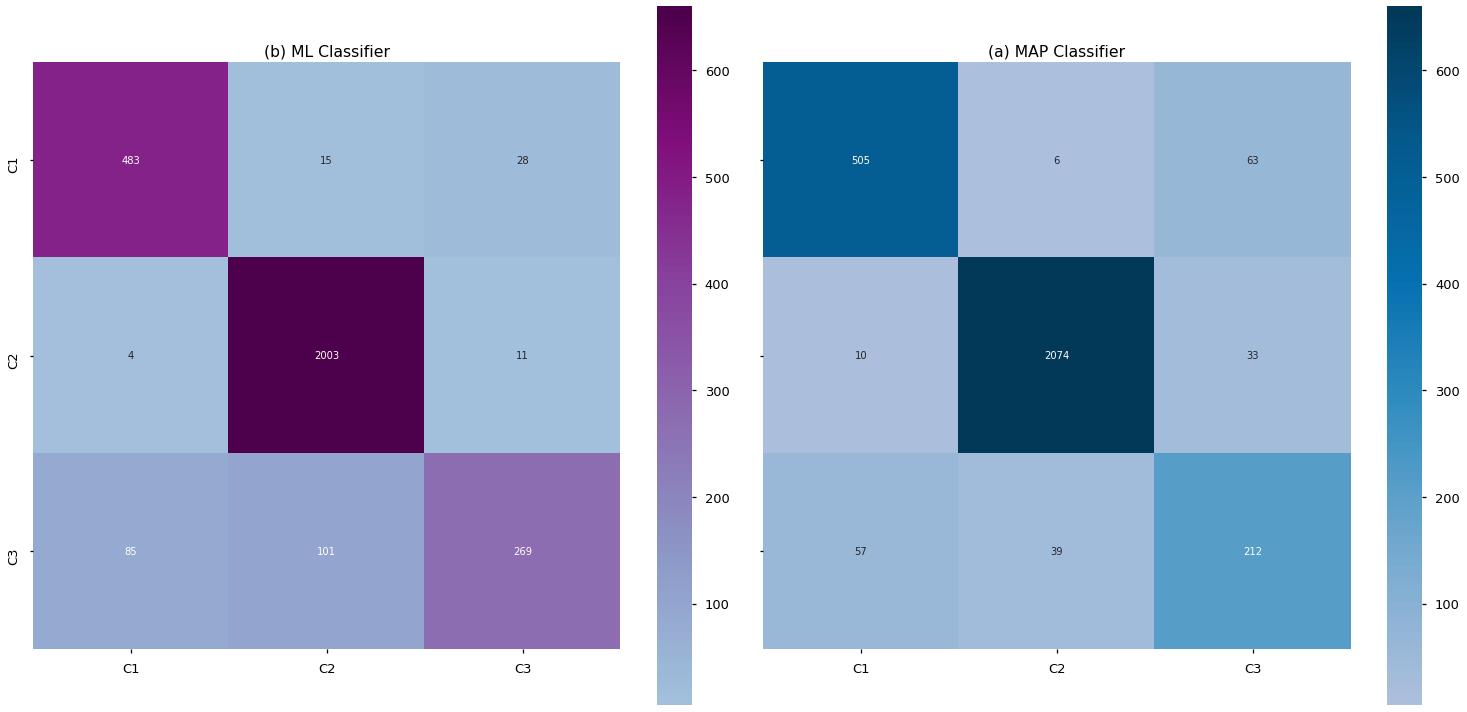

In [0]:
confusionMatrixML = pd.DataFrame(confusionMatrixML, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])

confusionMatrixMAP = pd.DataFrame(confusionMatrixMAP, index = ["C1", "C2", "C3"],
                  columns = ["C1", "C2", "C3"])


fig, ax = plt.subplots(nrows = 1,ncols = 2, sharey = True, figsize = [21.0, 10.0])

ax[0] = sns.heatmap(confusionMatrixML, annot = True, fmt = 'g', cbar = True, ax = ax[0], square = True, cmap="BuPu", vmin = 5, vmax = 660, center = 150, robust = True)
ax[0].set_title('(b) ML Classifier')

ax[1].set_title('(a) MAP Classifier')

ax[1] = sns.heatmap(confusionMatrixMAP, annot = True, fmt = 'g', cbar = True, ax = ax[1], square = True, cmap="PuBu", vmin = 5, vmax = 660, center = 150, robust = True) #"RdYlGn" cubehelix
fig.tight_layout()

## 3. The MNIST dataset contains a set of images containing the digits 0 to 9. Each image in the data set is a 28x28 image. The data is divided into two sets of images: a training set and a testing set. The MNIST dataset can be downloaded from http://yann.lecun.com/exdb/mnist/. The training set is used in this exercise. 


### a) Program PCA that takes X(DxN) and returns Y(dxN) where N is the number of samples, D is the number of input features, and d is the numberof features selected by the PCA algorithm.
https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f


In [0]:
# https://stackoverflow.com/a/53570674
# To read file

# MNIST = gzip.open('train-images-idx3-ubyte.gz','r')
# f = gzip.open('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz','r')

try:

  print("getting file from the internet")
  mnist = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')
  MNIST = gzip.open(mnist,'r')

except:
  print("Failed to find file, attempting to get training file locally")
  MNIST = gzip.open('train-images-idx3-ubyte.gz','r')

else:
  print("File found on the internet")


image_size = 28
num_images = 60000

MNIST.read(16)
buf = MNIST.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
# data = data.reshape(num_images, image_size, image_size)

# #to use image:
# # import matplotlib.pyplot as plt
# # image = np.asarray(data[59000])
# # plt.imshow(image)
# # plt.show()
# #reshape it into vector of num_images by 784 (1 number per row)
data2=data.reshape(num_images, 784) 
# data2.shape
# plt.imshow(data2[504,:].reshape(image_size,image_size))

#Obtaining the eigenvalues
# mnist_cov = np.cov(data2)
# from numpy import linalg as LA #Import numpy's linear algebra functions
# eigenvalues, eigenvectors = LA.eig(mnist_cov) #Obtain the eigenvalues and eigenvectors
# df_eigenvalues = pd.DataFrame(eigenvalues).transpose() #Make the eigenvalues a DataFrame for easier viewing
# df_eigenvalues #Show the DataFrame

#Standardize
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data2)
print(standardized_data.shape)
#find the co-variance matrix which is : A^T * A
standardized_data_x = standardized_data[0]
standardized_data_y = standardized_data[1]

covariance_matrix = np.array([[covariance(standardized_data_x,standardized_data_x),\
                               covariance(standardized_data_x,standardized_data_y)],\
                               [covariance(standardized_data_y,standardized_data_x),\
                                covariance(standardized_data_y,standardized_data_y)]])



print ("The shape of variance matrix = ", covariance_matrix.shape)
from numpy import linalg as LA #Import numpy's linear algebra functions
eigenvalues, eigenvectors = LA.eigh(covariance_matrix) #Obtain the eigenvalues and eigenvectors



getting file from the internet
File found on the internet
(60000, 784)


NameError: ignored

In [0]:
def explainedVariance(eigenvals, y = 20, annotationPeriod = 10):
  eigenvals_sum = sum(eigenvals) #Obtain the total of the eigenvalues
  var_exp = [(i / eigenvals_sum) * 100 for i in sorted(eigenvals, reverse=True)] #Obtain the 'variance each component explains' 
  cum_var_exp = np.cumsum(var_exp) #Obtain the cumulative variance

  x=['EV %s' %i for i in range(1,len(var_exp))] #Create the x ticks labels for the plot

  #-----------------------------------------------------
  #For ease of view, show only the first y eigenvalues:
  x = x[0:y]
  var_exp = var_exp[0:y]
  cum_var_exp = cum_var_exp[0:y]
  max_percentage = int(np.max(cum_var_exp)/10) #Calculate the max percentage to display (for the plot scaling)
  #-----------------------------------------------------

  y_pos = np.arange(len(x)) #Obtain the number of elements in the plots
  plt.figure(figsize = (15,15))
  plt.bar(y_pos, var_exp, align = 'center', alpha = 0.5, label = "Percentage of the components' total variance") #Graph the bar chart
  plt.plot(y_pos, cum_var_exp, '-o', label='Cumulative explained variance') #Plot the cumulative variance
  plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0., fontsize = 'x-large') #Plot the legend outside of the plot
  for i in range(len(x)):
    if i % annotationPeriod == 0:
        plt.annotate(round(cum_var_exp[i],2), xy = (i,cum_var_exp[i] - 3), fontsize = 'large') #Annotate the (rounded) cumulative explained variance under each value
  for i in range(max_percentage):
      plt.axhline(y = 10 * (i + 1), alpha = 0.1, color = 'black') #Graph horizontal lines for easier viewing
  plt.xticks(y_pos, x, fontsize='large') #Plot the x ticks
  plt.yticks(fontsize = 'large')
  plt.ylabel('Percentage', fontsize = 'large') #Plot the y label
  plt.title('Percentage of variance each component adds', fontsize = 'large') #Add a title to the graph
  plt.show() #Display the graph